<a href="https://colab.research.google.com/github/shubha07m/Deep-learning-using-Python-CS5590/blob/master/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
from google.colab import drive
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [2]:
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/GT_data'
files = os.listdir(drive_path)
print(files)

Mounted at /content/drive
['train', 'test', 'valid']


In [3]:
names = os.listdir(os.path.join(drive_path,'train'))
print(names)

['s02', 's03', 's01', 's04', 's05']


In [4]:
vgg_model = tf.keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 7s 0us/step


In [5]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
base_model = keras.models.Sequential()

for layer in vgg_model.layers[:-1]:
  layer.trainable = False
  base_model.add(layer)

In [7]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [8]:
from keras.layers import Dense
base_model.add(Dense(len(names)))

In [9]:
# Loss and optimizers #

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]
base_model.compile(optimizer=opt,loss=loss, metrics=metrics)
new_model = base_model

In [10]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [11]:
preprocess = keras.applications.vgg16.preprocess_input

In [49]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [12]:
train_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess)
valid_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess)
test_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess)

In [13]:
train_batches = train_gen.flow_from_directory(
    os.path.join(drive_path,'train'), target_size = (224,224),
    class_mode = 'sparse', batch_size = 3,
    shuffle = False, color_mode = 'rgb',
    classes = names)

Found 45 images belonging to 5 classes.


In [14]:
valid_batches = valid_gen.flow_from_directory(
    os.path.join(drive_path,'valid'), target_size = (224,224),
    class_mode = 'sparse', batch_size = 3,
    shuffle = False, color_mode = 'rgb',
    classes = names)

Found 15 images belonging to 5 classes.


In [15]:
test_batches = test_gen.flow_from_directory(
    os.path.join(drive_path,'test'), target_size = (224,224),
    class_mode = 'sparse', batch_size = 3,
    shuffle = False, color_mode = 'rgb',
    classes = names)

Found 15 images belonging to 5 classes.


In [16]:
train_batch = train_batches[0]
print(train_batch[0].shape)
print(train_batch[1])
test_batch = test_batches[0]
print(test_batch[0].shape)
print(test_batch[1])

(3, 224, 224, 3)
[0. 0. 0.]
(3, 224, 224, 3)
[0. 0. 0.]


In [17]:
epochs = 30

early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, verbose=2)

In [ ]:
history = new_model.fit(train_batches, validation_data=valid_batches, callbacks= early_stopping, verbose=2, epochs=epochs)

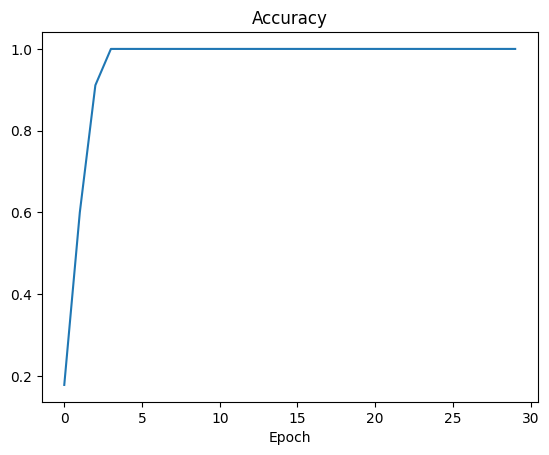

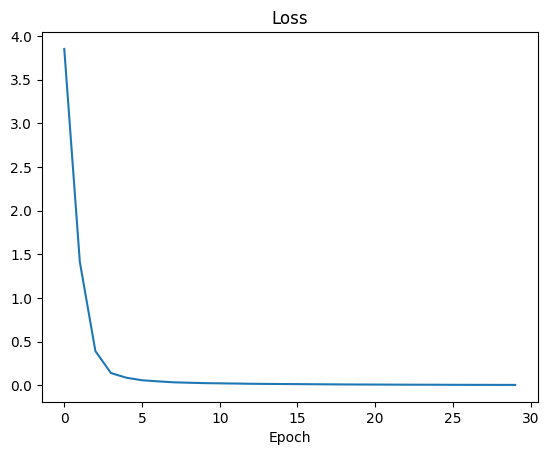

In [21]:
# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot the loss
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.show()

In [22]:
new_model.evaluate(test_batches)

5/5 [==============================] - 2s 532ms/step - loss: 0.0980 - accuracy: 0.9333


[0.09804697334766388, 0.9333333373069763]

In [23]:
pred = new_model.predict_on_batch(test_batch[0])
pred_list = (pred.tolist())
len(pred_list)

3

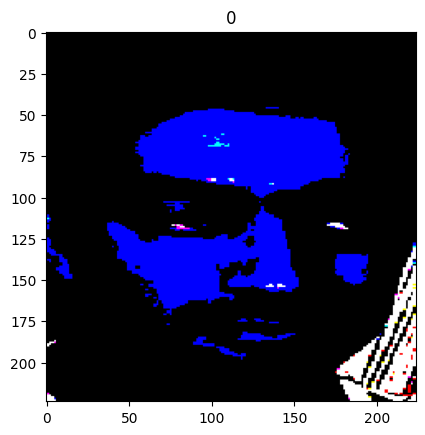

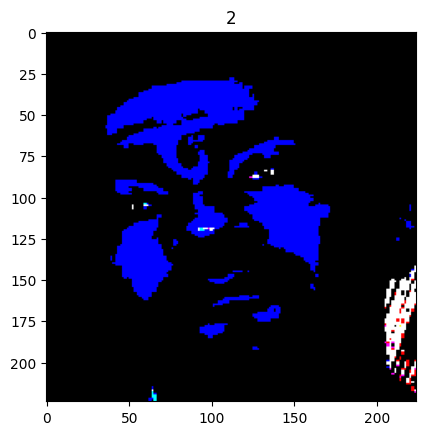

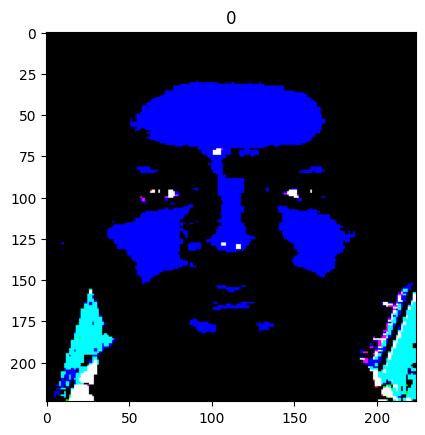

In [34]:
for i in range(len(pred_list)):
  plt.title(np.argmax(pred_list[i]))
  plt.imshow(test_batch[0][i])
  plt.show()
